# Usage

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import napari
import os
from MGFeatures import ER_length, img_from_tiles, label_cells, mask_it, draw_bbox, get_ratio
from skimage import io
import gc
from skimage.measure import regionprops

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
properties = {}

In [3]:
#single slice usage
folder = r'C:\Users\hanyi\Documents\MG\Cell_s1'
cells = img_from_tiles(folder, 1)

In [20]:
#multi slice usage - total number slices known
folder = r'C:\Users\hanyi\Documents\MG\ER'
#ER = [img_from_tiles(folder, i) for i in range(17)]
#ER = (img_from_tiles(folder, i) for i in range(17)) # if memory error
ER = img_from_tiles(folder, 1)

In [4]:
labels = label_cells(cells)
del cells
gc.collect()

1172

## ER length

In [21]:
#properties = {} #to be added to main function global variable
ER_lengths = ER_length(ER[20000:30000, 20000:30000], labels[20000:30000, 20000:30000])

In [35]:
properties['ER_lengths'] = ER_lengths

## Area, ratio

In [5]:
folder = r'C:\Users\hanyi\Documents\MG\organelles_cyto'
organelles = img_from_tiles(folder, 1)

In [6]:
organelles_labels = mask_it(labels[20000:30000, 20000:30000], organelles[20000:30000, 20000:30000]) #subset of slice, memory error 

In [28]:
properties['organelle_ratio'] = []

In [32]:
%%time
organelle_cell_ratio = get_ratio(organelles_labels, labels[20000:30000, 20000:30000])
properties['organelle_ratio'] = organelle_cell_ratio

CPU times: total: 12.8 s
Wall time: 12.8 s


## visualisation

In [9]:
bbox_rects = []
for region in regionprops(labels[20000:30000, 20000:30000]):
    bbox = region.bbox
    bbox_rect = draw_bbox(bbox)
    bbox_rects.append(bbox_rect)

In [10]:
viewer = napari.view_labels(labels[20000:30000, 20000:30000])
viewer.add_image(organelles[20000:30000, 20000:30000])

<Image layer 'Image' at 0x1ed80b60460>

In [26]:
viewer.add_image(ER[20000:30000, 20000:30000])

<Image layer 'Image [1]' at 0x1ed91128d00>

In [36]:
text_params = {'string':'R: {organelle_ratio:.5f}\nER: {ER_lengths:.2f}',
              'size': 5,
              'color': 'gray',
              'anchor':'upper_left',
              'translation':[0,0]
              }

In [37]:
viewer.add_shapes(data=np.array(bbox_rects),
                 properties=properties, #try properties/features
                 text=text_params,
                 face_color='transparent',
                 edge_color='white') # try properties

<Shapes layer 'Shapes' at 0x1ed9156a380>

In [15]:
viewer.add_labels(labels[20000:30000, 20000:30000])


<Labels layer 'Labels' at 0x1ed873af070>

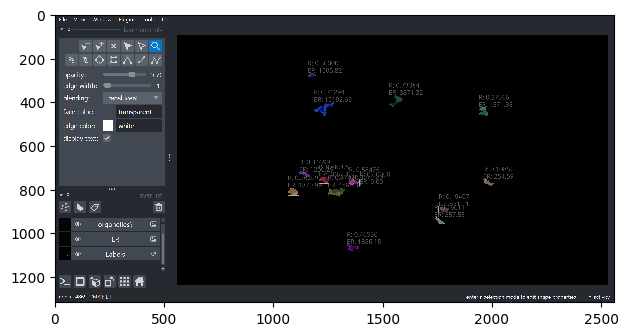

In [41]:
io.imshow(viewer.screenshot(canvas_only=False))

## trash

In [9]:
properties['ER_length']

KeyError: 'ER_length'

In [12]:
np.unique(labels)

StackViewNDArray([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                  28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
                  56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
                  70, 71, 72, 73, 74], dtype=uint8)

In [76]:
del cells
gc.collect()

NameError: name 'cells' is not defined

In [26]:
import sys 
print(sys.getsizeof(organelles)/(1024**3))
print(sys.getsizeof(labels)/(1024**3))

3.5000001192092896
3.5000001415610313


## other useful functions

In [58]:
import sys 
sys.getsizeof(ER)/(1024**3)

3.5000001192092896

In [17]:
viewer.layers.pop(1)

<Image layer 'Image' at 0x2741cefce20>

In [38]:
# free up space
del variable1, variable2
gc.collect()


854